In [1]:
import numpy as np
from random import random
import igl
import math
import matplotlib.pyplot as plt
import matplotlib.colors
import mpl_toolkits.mplot3d
from icosphere import icosphere
import os

In [2]:
vertices = np.array([[0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0], [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1]], dtype=np.float64)
faces = np.array([[0, 1, 2], [0, 2, 3], [1, 5, 6], [1, 6, 2], [5, 4, 7], [5, 7, 6], [4, 0, 3], [4, 3, 7], [3, 2, 6], [3, 6, 7], [1, 0, 4], [1, 4, 5]])

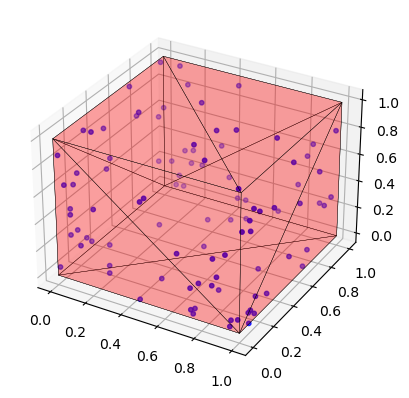

In [3]:
# Source: http://www.joesfer.com/?p=84

def sample_mesh(vertices, faces, n_samples):
    # Step 1: Compute areas of all triangles
    areas = []
    for face in faces:
        v1 = vertices[face[0]]
        v2 = vertices[face[1]]
        v3 = vertices[face[2]]
        e1 = v2 - v1
        e2 = v3 - v1
        area = 0.5 * np.linalg.norm(np.cross(e1, e2))
        areas.append(area)

    # Step 2: Compute proportional weights
    weights = np.ceil(np.array(areas) / np.min(areas)).astype(int)

    # Step 3: Create array of indices
    indices = np.repeat(np.arange(len(faces)), weights)

    # Step 4: Select random index and sample point in corresponding triangle using barycentric coordinates
    points = np.zeros((n_samples, 3))
    for i in range(n_samples):
        random_index = np.random.choice(indices)
        face = faces[random_index]
        v1 = vertices[face[0]]
        v2 = vertices[face[1]]
        v3 = vertices[face[2]]
        u, v = random(), random()
        # point = u*A + v*B + w*C = u*A + v*B + (1 - (u+v)) * C
        point = (1 - u) * v1 + u * (1 - v) * v2 + u * v * v3
        # point = u* v1 + v * v2 + (1-u-v) * v3
        points[i] = point

    return points

samples = sample_mesh(vertices, faces, 100)

poly = mpl_toolkits.mplot3d.art3d.Poly3DCollection(vertices[faces])
poly.set_facecolor('red') 
poly.set_edgecolor('black')
poly.set_linewidth(0.25)
poly.set_alpha(0.2)

fig = plt.figure()
# and now -- visualization!
ax = fig.add_subplot(111, projection='3d')
ax.scatter(samples[:,0], samples[:,1], samples[:,2], c='blue', s=10)

ax.add_collection3d(poly) 
plt.show()

In [4]:
def sample_faces(vertices, faces, num_samples):
    # calculate the area of each triangle
    a = vertices[faces[:, 0]]
    b = vertices[faces[:, 1]]
    c = vertices[faces[:, 2]]
    areas = np.linalg.norm(np.cross(b-a, c-a), axis=1) / 2

    # normalize areas to get probability distribution
    probabilities = areas / np.sum(areas)

    # randomly choose triangles to sample from
    face_indices = np.random.choice(len(faces), size=num_samples, p=probabilities)

    # generate random points within each selected triangle
    u = np.random.rand(num_samples, 1)
    v = np.random.rand(num_samples, 1)
    w = 1 - u - v
    a = vertices[faces[face_indices, 0]]
    b = vertices[faces[face_indices, 1]]
    c = vertices[faces[face_indices, 2]]
    points = u * a + v * b + w * c

    return points

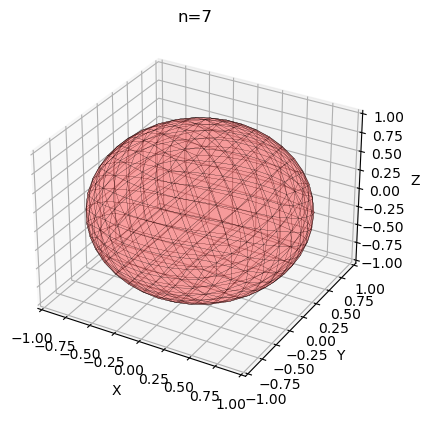

In [5]:
nu = 7
vertices, faces = icosphere(nu)

# creating mesh with given face colors
poly = mpl_toolkits.mplot3d.art3d.Poly3DCollection(vertices[faces])
poly.set_facecolor('red') 
poly.set_edgecolor('black')
poly.set_linewidth(0.1)
poly.set_alpha(0.2)

# sampling points on the mesh
samples = sample_faces(vertices, faces, 100)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  

# ax.scatter(samples[:,0], samples[:,1], samples[:,2], c='blue', s=10)
ax.add_collection3d(poly) 

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(f'n={nu}')
plt.show()

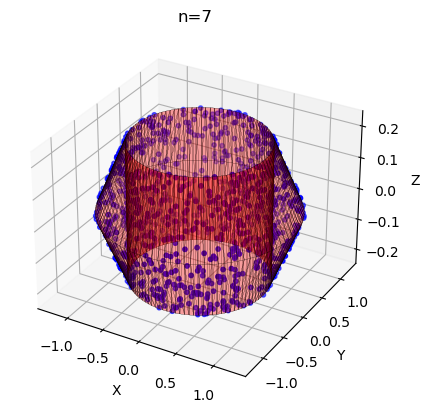

In [6]:
current_dir = os.getcwd()

vertices, faces = igl.read_triangle_mesh(os.path.join(current_dir, "data", "torus-100-3-.25.obj"))

# creating mesh with given face colors
poly = mpl_toolkits.mplot3d.art3d.Poly3DCollection(vertices[faces])
poly.set_facecolor('red') 
poly.set_edgecolor('black')
poly.set_linewidth(0.1)
poly.set_alpha(0.2)

# sampling points on the mesh
samples = sample_faces(vertices, faces, 1000)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  

ax.scatter(samples[:,0], samples[:,1], samples[:,2], c='blue', s=10)
ax.add_collection3d(poly) 

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(f'n={nu}')
plt.show()